In [2]:
import os
import pandas as pd

global_window_id = 0

def process_labeled_data(file_path, window_size, step_size):
    """处理labeled_data.csv文件，基于窗口切分数据"""
    global global_window_id
    df = pd.read_csv(file_path)
    tactile_contact_df = pd.read_csv("../DATA/Labeled_data/0724-7DT-S1/0724-7DT-S1_contactBlock.csv")

    windowed_data = []

    for start in range(0, len(df) - window_size + 1, step_size):
        end = start + window_size
        window = df.iloc[start:end].copy()
        window['window_id'] = global_window_id
        global_window_id += 1

        if (window['label'] == 0).all():
            window['tactile_type_window'] = 'NC'
            window['block_id'] = None
        else:
            window_start_time = window.iloc[0]['time']
            window_end_time = window.iloc[-1]['time']
            matching_contacts = tactile_contact_df[
                (tactile_contact_df['time'] >= window_start_time) & 
                (tactile_contact_df['time'] <= window_end_time)
            ]

            if not matching_contacts.empty:
                window['tactile_type_window'] = matching_contacts.iloc[0]['touch_type']
                window['block_id'] = matching_contacts.iloc[0]['block_id']
            else:
                window['tactile_type_window'] = 'NC'
                window['block_id'] = None
        
        windowed_data.append(window)

    # 将所有窗口数据合并为一个大的DataFrame
    result_df = pd.concat(windowed_data, ignore_index=True)

    # 构造输出文件路径
    output_file_path = file_path.replace(".csv", "_window.csv")

    # 保存为CSV文件
    result_df.to_csv(output_file_path, index=False)
    print(f"窗口化的数据已保存到: {output_file_path}")

# 使用示例
file_path = '../DATA/Labeled_data/0724-7DT-Y1/labeled_data.csv'
window_size = 28
step_size = 14

process_labeled_data(file_path, window_size, step_size)


窗口化的数据已保存到: ../DATA/Labeled_data/0724-7DT-S1/labeled_data_window.csv


In [4]:
# 0724-7DT-S1:59 blocks
wind_df = pd.read_csv("/Users/shangyu/Documents/GitHub/tactileGestureDetection/DATA/Labeled_data/0724-7DT-S1/labeled_data_window.csv")


wind_df['block_id'].nunique()
# wind_df.groupby(['window_id','block_id'])
# pd.set_option('display.max_rows', None)

# grouped_df = wind_df.groupby(['window_id', 'block_id']).size().reset_index()[['window_id', 'block_id']]

# # 显示结果
# # print(grouped_df)

# 筛选 window_id 在 82 到 84 之间的数据
# filtered_data = wind_df[wind_df['window_id'].between(82, 84)]
# filtered_data = wind_df[wind_df['block_id']==2.0]
# filtered_data

59

      window_id tactile_type_window  label
2324         83                  DT      0
2325         83                  DT      0
2326         83                  DT      0
2327         83                  DT      0
2328         83                  DT      0
2329         83                  DT      0
2330         83                  DT      0
2331         83                  DT      0
2332         83                  DT      0
2333         83                  DT      0
2334         83                  DT      0
2335         83                  DT      0
2336         83                  DT      0
2337         83                  DT      0
2338         83                  DT      0
2339         83                  DT      0
2340         83                  DT      0
2341         83                  DT      0
2342         83                  DT      1
2343         83                  DT      1
2344         83                  DT      1
2345         83                  DT      1
2346       

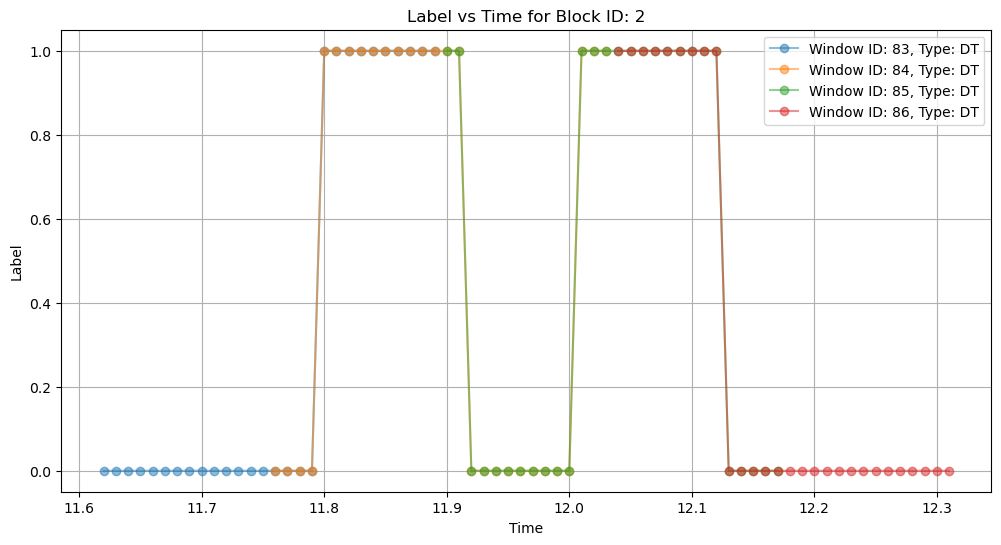

In [15]:
#plot 双拍验证
import pandas as pd
import matplotlib.pyplot as plt

block_id_to_plot = 2

# 筛选出指定 block_id 的数据
block_data = wind_df[wind_df['block_id'] == block_id_to_plot]

# 获取对应的 window_id
# window_info  = block_data[['window_id', 'tactile_type_window']].drop_duplicates()
window_info  = block_data[['window_id', 'tactile_type_window', 'label']]
# print(window_info)

# 绘制图表
plt.figure(figsize=(12, 6))

grouped_window = window_info.groupby('window_id')


for window_id ,group in grouped_window:
    print(group)
    print('---------------------')
    tactile_type = group["tactile_type_window"].iloc[0]
    window_data = block_data[block_data['window_id'] == window_id]
    
    plt.plot(window_data['time'], window_data['label'], marker='o', label=f'Window ID: {window_id}, Type: {tactile_type}',alpha=0.5)
    # plt.title(f'Label vs Time for Window ID: {window_id}')
    # plt.xlabel('Time')
    # plt.ylabel('Label')
    # plt.grid(True)
    # plt.show()
# 对每个 window_id 单独绘制
# for _, row in window_info.iterrows():
#     window_id = row['window_id']
#     tactile_type = row['tactile_type_window']
    
#     # 获取当前 window_id 对应的数据
#     window_data = block_data[block_data['window_id'] == window_id]
    
#     # 绘制数据
#     plt.plot(window_data['time'], window_data['label'], marker='o', label=f'Window ID: {window_id}, Type: {tactile_type}')


plt.title(f'Label vs Time for Block ID: {block_id_to_plot}')
plt.xlabel('Time')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.show()


